# **Final paper using Pandas and Plotly resources.**

## Code

In [ ]:
csv_url = "https://raw.githubusercontent.com/jpp2167-max/Final-Paper---Macro-Indicators/refs/heads/main/macro_indicators.csv"

In [ ]:
import pandas as pd

# Read CSV
df = pd.read_csv(csv_url)
print(df.head(11))


           Country    GDP  GDP Growth  Interest Rate  Inflation Rate  \
0    United States  29185         3.8           4.25            2.90   
1            China  18744         1.1           3.00           -0.40   
2        Euro Area  16406         0.1           2.15            2.00   
3          Germany   4660        -0.3           2.15            2.20   
4            Japan   4026         0.5           0.50            2.70   
5            India   3913         1.7           5.50            2.07   
6   United Kingdom   3644         0.3           4.00            3.80   
7           France   3162         0.3           2.15            0.90   
8            Italy   2373        -0.1           2.15            1.60   
9           Canada   2241        -0.4           2.50            1.90   
10          Brazil   2179         0.4          15.00            5.13   

    Jobless Rate  Gov. Budget  Debt/GDP  Current Account  Population  
0            4.3         -6.4    124.30            -3.90      34

In [ ]:
df = df.sort_values('GDP', ascending=False)
df["Real Interest Rate"] = df["Interest Rate"] - df["Inflation Rate"]
df.head(11)

,Country,GDP,GDP Growth,Interest Rate,Inflation Rate,Jobless Rate,Gov. Budget,Debt/GDP,Current Account,Population,Real Interest Rate
0,United States,29185,3.8,4.25,2.90,4.3,-6.4,124.30,-3.90,341.15,1.35
1,China,18744,1.1,3.00,-0.40,5.3,-6.5,88.30,2.20,1408.00,3.40
2,Euro Area,16406,0.1,2.15,2.00,6.2,-3.1,87.40,2.60,351.38,0.15
3,Germany,4660,-0.3,2.15,2.20,6.3,-2.8,62.50,5.70,83.58,-0.05
4,Japan,4026,0.5,0.50,2.70,2.3,-2.3,236.70,4.70,120.65,-2.20
5,India,3913,1.7,5.50,2.07,5.1,-4.8,81.92,-0.60,1398.60,3.43
6,United Kingdom,3644,0.3,4.00,3.80,4.7,-4.8,95.90,-2.70,69.23,0.20
7,France,3162,0.3,2.15,0.90,7.5,-5.8,113.00,0.40,68.44,1.25
8,Italy,2373,-0.1,2.15,1.60,6.0,-3.4,135.30,1.10,58.93,0.55
9,Canada,2241,-0.4,2.50,1.90,7.1,-2.1,110.80,-1.00,41.53,0.60


In [62]:
selected_columns = ["Country", "GDP", "Interest Rate", "Inflation Rate", "Real Interest Rate"]
df_real = df[selected_columns]
df_real = df_real.sort_values('Real Interest Rate', ascending=False)
df_real.head(20)

,Country,GDP,Interest Rate,Inflation Rate,Real Interest Rate
134,Yemen,19,27.00,0.77,26.23
89,Congo,71,25.00,8.16,16.84
130,Niger,20,5.25,-9.00,14.25
159,Sierra Leone,8,18.75,5.85,12.90
141,Afghanistan,17,14.94,2.20,12.74
165,Liberia,5,17.25,5.60,11.65
168,Djibouti,4,11.20,1.00,10.20
42,Egypt,389,22.00,12.00,10.00
81,Ghana,83,21.50,11.50,10.00
10,Brazil,2179,15.00,5.13,9.87


## Part 5 — Visualization (Pandas + Plotly)

In [61]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Sort countries by GDP for clearer visualization (optional)
df_real = df_real.sort_values("Interest Rate", ascending=False).head(20)

# --- Create the base figure with bars for GDP ---
fig = px.bar(df_real, x="Country", y="GDP", title="Countries Economic Indicators - Top 20 GDP")

# --- Add the three line series for interest and inflation rates ---
fig.add_trace(go.Scatter(
    x=df_real["Country"], y=df_real["Interest Rate"],
    name="Interest Rate", mode="lines+markers", yaxis="y2"))

fig.add_trace(go.Scatter(
    x=df_real["Country"], y=df_real["Inflation Rate"],
    name="Inflation Rate", mode="lines+markers", yaxis="y2"))

fig.add_trace(go.Scatter(
    x=df_real["Country"], y=df_real["Real Interest Rate"],
    name="Real Interest Rate", mode="lines+markers", yaxis="y2"))

# --- Add a secondary Y-axis for rates ---
fig.update_layout(
    yaxis=dict(title="GDP"),
    yaxis2=dict(
        title="Rates (%)",
        overlaying="y",
        side="right"),
    legend=dict(x=0.02, y=0.98),
    title_x=0.5)

fig.show()

In [63]:
import plotly.express as px

scatter_df = df.reset_index()
scatter_df['Size'] = scatter_df['Country'].apply(lambda x: 40 if x == 'Brazil' else 3)
fig = px.scatter(scatter_df,
                 x='Interest Rate',
                 y='Inflation Rate',
                 title = 'Countries',
                 color = 'Country',
                 size = 'Size')

fig.update_xaxes(range=[0, 20])   # x-axis from 0 to 20
fig.update_yaxes(range=[0, 20])  # y-axis from -5 to 15

fig.show()

In [ ]:
scatter_df = df.reset_index().sort_values('Debt/GDP', ascending = False)
scatter_df['Size'] = scatter_df['Country'].apply(lambda x: 40 if x == 'Brazil' else 3)
fig = px.scatter(scatter_df,
                 x='Interest Rate',
                 y='Debt/GDP',
                 title = 'Countries',
                 color = 'Country',
                 size = 'Size')

fig.update_xaxes(range=[0, 20])   # x-axis from 0 to 20
#fig.update_yaxes(range=[0, 20])  # y-axis from -5 to 15

fig.show()

In [65]:
import plotly.express as px

brics = ['Brazil', 'Russia', 'India', 'China', 'South Africa']

scatter_df = df.reset_index().sort_values('Debt/GDP', ascending=False)
scatter_df['Group'] = scatter_df['Country'].apply(lambda x: x if x in brics else 'Other')

# Make Brazil larger
scatter_df['Size'] = scatter_df['Country'].apply(lambda x: 200 if x == 'Brazil' else 30)

fig = px.scatter(
    scatter_df,
    x='Interest Rate',
    y='Debt/GDP',
    title='BRICS Countries',
    color='Group',
    size='Size',
    color_discrete_map={
        'Brazil': 'green',
        'Russia': 'red',
        'India': 'orange',
        'China': 'blue',
        'South Africa': 'purple',
        'Other': 'lightgray'},
    hover_name='Country')

fig.update_xaxes(range=[0, 20])
fig.show()

In [67]:
# Define Latin American countries
latin_america = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba',
    'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala', 'Honduras',
    'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela'
]

# Prepare data
scatter_df = df.reset_index().sort_values('Debt/GDP', ascending=False)

# Create grouping: Latin America vs Other
scatter_df['Group'] = scatter_df['Country'].apply(lambda x: x if x in latin_america else 'Other')

# Make Brazil larger for emphasis (optional)
scatter_df['Size'] = scatter_df['Country'].apply(lambda x: 200 if x == 'Brazil' else 30)

# Create scatter plot
fig = px.scatter(
    scatter_df,
    x='Interest Rate',
    y='Debt/GDP',
    title='Latin American Countries vs Others',
    color='Group',
    size='Size',
    color_discrete_map={
        'Brazil': 'green',
        'Argentina': 'orange',
        'Mexico': 'blue',
        'Chile': 'red',
        'Colombia': 'purple',
        'Peru': 'brown',
        'Other': 'lightgray'
    },
    hover_name='Country'
)

# Adjust axes and layout
fig.update_xaxes(title='Interest Rate (%)', range=[0, 20])
fig.update_yaxes(title='Debt-to-GDP Ratio (%)')
fig.update_layout(title_x=0.5)

fig.show()

In [69]:
import plotly.express as px

# Define a list of major emerging markets (can be expanded)
emerging_markets = [
    'Brazil', 'Mexico', 'India', 'China', 'South Africa', 'Indonesia',
    'Turkey', 'Thailand', 'Malaysia', 'Philippines', 'Vietnam',
    'Poland', 'Hungary', 'Czech Republic', 'Chile', 'Colombia',
    'Peru', 'Egypt', 'Pakistan'
]

# Prepare data
scatter_df = df.reset_index().sort_values('Debt/GDP', ascending=False)

# Group emerging markets vs others
scatter_df['Group'] = scatter_df['Country'].apply(lambda x: 'Emerging Market' if x in emerging_markets else 'Other')

# Make Brazil larger (optional emphasis)
scatter_df['Size'] = scatter_df['Country'].apply(lambda x: 200 if x == 'Brazil' else 20)

# Create scatter plot
fig = px.scatter(
    scatter_df,
    x='Interest Rate',
    y='Debt/GDP',
    title='Emerging Markets vs Other Countries',
    color='Group',
    size='Size',
    color_discrete_map={
        'Emerging Market': 'blue',
        'Other': 'lightgray'
    },
    hover_name='Country'
)

# Customize layout and axes
fig.update_xaxes(title='Interest Rate (%)', range=[0, 20])
fig.update_yaxes(title='Debt-to-GDP Ratio (%)')
fig.update_layout(title_x=0.5)

fig.show()


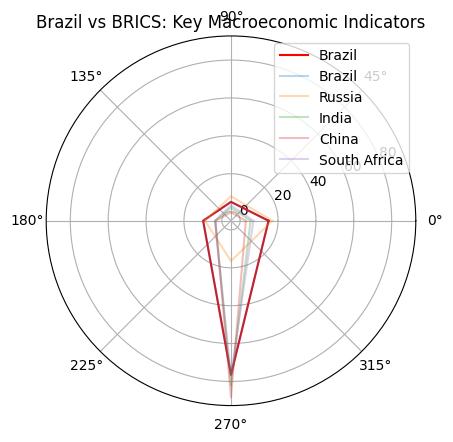

In [70]:
from math import pi
import matplotlib.pyplot as plt
import pandas as pd

# Suppose df has columns ['Country', 'Interest Rate', 'Inflation Rate', 'Real Interest Rate', 'Debt/GDP']
brics = ['Brazil', 'Russia', 'India', 'China', 'South Africa']
df_brics = df[df['Country'].isin(brics)]

# Normalize and plot radar chart
categories = ['Interest Rate', 'Inflation Rate', 'Real Interest Rate', 'Debt/GDP']
N = len(categories)

values = df_brics.loc[df_brics['Country']=='Brazil', categories].values.flatten().tolist()
values += values[:1]
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.polar(angles, values, label='Brazil', color='red')
for country in brics:
    vals = df_brics.loc[df_brics['Country']==country, categories].values.flatten().tolist()
    vals += vals[:1]
    plt.polar(angles, vals, label=country, alpha=0.3)
plt.legend(loc='upper right')
plt.title("Brazil vs BRICS: Key Macroeconomic Indicators")
plt.show()


In [75]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# --- Helper: plot one grouped chart ---
def plot_group(df, countries, title):
    df_g = df[df['Country'].isin(countries)].copy()
    # optional: keep the same sorting idea from your model (by Interest Rate, top 20)
    df_g = df_g.sort_values("GDP", ascending=False).head(20)

    # Bars = GDP
    fig = px.bar(df_g, x="Country", y="GDP", title=title)

    # Lines on secondary axis
    fig.add_trace(go.Scatter(
        x=df_g["Country"], y=df_g["Interest Rate"],
        name="Interest Rate", mode="lines+markers", yaxis="y2"))
    fig.add_trace(go.Scatter(
        x=df_g["Country"], y=df_g["Inflation Rate"],
        name="Inflation Rate", mode="lines+markers", yaxis="y2"))
    fig.add_trace(go.Scatter(
        x=df_g["Country"], y=df_g["Debt/GDP"],
        name="Debt/GDP", mode="lines+markers", yaxis="y2"))

    fig.update_layout(
        yaxis=dict(title="GDP"),
        yaxis2=dict(title="Rates / Debt-to-GDP (%)", overlaying="y", side="right"),
        legend=dict(x=0.02, y=0.98),
        title_x=0.5
    )
    fig.update_xaxes(title="Country")
    fig.show()

# --- Define groups ---
brics = ['Brazil', 'Russia', 'India', 'China', 'South Africa']

latin_america = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba',
    'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala', 'Honduras',
    'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela'
]

emerging_markets = [
    'Brazil', 'Mexico', 'India', 'China', 'South Africa', 'Indonesia',
    'Turkey', 'Thailand', 'Malaysia', 'Philippines', 'Vietnam',
    'Poland', 'Hungary', 'Czech Republic', 'Chile', 'Colombia',
    'Peru', 'Egypt', 'Pakistan'
]

# --- Plot the three requested charts ---
plot_group(df, brics, "BRICS — GDP (bars) with Interest, Inflation & Debt/GDP (lines)")
plot_group(df, latin_america, "Latin America — GDP (bars) with Interest, Inflation & Debt/GDP (lines)")
plot_group(df, emerging_markets, "Emerging Markets — GDP (bars) with Interest, Inflation & Debt/GDP (lines)")

